In [ ]:
# Setup Python path and imports
import sys
from pathlib import Path

# Add the project root to Python path
project_root = Path(__file__).parent.parent if '__file__' in globals() else Path.cwd().parent
sys.path.append(str(project_root))

# ML toolbox imports
from ml_toolbox.data_loader import DatasetManager, DataLoader

# Initialize dataset manager
dataset_path = project_root / "data_set"
dm = DatasetManager(dataset_path)

# Initialize data loader 
data_loader = DataLoader(dataset_path)

# Get dataset index and statistics
index = dm.get_index()
stats = dm.get_statistics()

print(f"Available conditions: {index['conditions']}")
print(f"Available frequencies: {index['frequencies']}")
print(f"Available loads: {index['loads']}")
print(f"Total files: {stats['total_files']}")

Available conditions: ['faulty_bearing', 'healthy', 'misalignment', 'system_misalignment']
Available frequencies: ['10hz', '20hz', '30hz', '40hz']
Available loads: ['no_load', 'under_load']
Total files: 134


# Multi-Frequency Analysis

In [8]:
# Import the new analysis modules
from ml_toolbox.analysis import (
    run_comprehensive_frequency_analysis,
    plot_feature_importance_comparison, 
    compare_top_features_across_frequencies
)

# Define frequencies to analyze
frequencies_to_analyze = ["10hz", "20hz", "30hz", "40hz"]
max_windows_per_class = 40  
window_length = 2048

print(f"Analysis Configuration:")
print(f"  Frequencies: {frequencies_to_analyze}")
print(f"  Load condition: no load")
print(f"  Max windows per class: {max_windows_per_class}")
print(f"  Window length: {window_length} samples")
print(f"  Total expected windows: ~{max_windows_per_class * len(frequencies_to_analyze) * 4} (4 classes)")
print("=" * 60)

Analysis Configuration:
  Frequencies: ['10hz', '20hz', '30hz', '40hz']
  Load condition: no load
  Max windows per class: 40
  Window length: 2048 samples
  Total expected windows: ~640 (4 classes)


In [13]:
# Run analysis across all frequencies with configurable window count
cv_results, importance_results = run_comprehensive_frequency_analysis(
    data_loader, 
    frequencies_to_analyze, 
    load="no load",
    max_windows_per_class=max_windows_per_class,
    window_length=window_length
)

INFO:ml_toolbox.data_loader.data_loader:Loading 12 files with 1 workers


Starting comprehensive analysis for frequencies: ['10hz', '20hz', '30hz', '40hz']
Load condition: no load
Max windows per class: 40
Loading 10hz no load data...


INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 12 files


Loaded 12 current sensor files for 10hz


INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'healthy': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/160 windows


Created 160 windows for 10hz


INFO:ml_toolbox.data_loader.feature_extraction:Processed 100/160 windows
INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 160 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


Extracted 112 features for 10hz
Evaluating model for 10hz...
10hz - Mean CV Accuracy: 0.956 ± 0.032
Computing feature importance for 10hz...


INFO:ml_toolbox.data_loader.data_loader:Loading 12 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 12 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'healthy': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/160 windows


10hz analysis completed
Loading 20hz no load data...
Loaded 12 current sensor files for 20hz
Created 160 windows for 20hz


INFO:ml_toolbox.data_loader.feature_extraction:Processed 100/160 windows
INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 160 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


Extracted 112 features for 20hz
Evaluating model for 20hz...
20hz - Mean CV Accuracy: 0.875 ± 0.044
Computing feature importance for 20hz...


INFO:ml_toolbox.data_loader.data_loader:Loading 12 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 12 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'healthy': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/160 windows


20hz analysis completed
Loading 30hz no load data...
Loaded 12 current sensor files for 30hz
Created 160 windows for 30hz


INFO:ml_toolbox.data_loader.feature_extraction:Processed 100/160 windows
INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 160 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


Extracted 112 features for 30hz
Evaluating model for 30hz...
30hz - Mean CV Accuracy: 0.988 ± 0.025
Computing feature importance for 30hz...


INFO:ml_toolbox.data_loader.data_loader:Loading 11 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 11 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'healthy': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/160 windows


30hz analysis completed
Loading 40hz no load data...
Loaded 11 current sensor files for 40hz
Created 160 windows for 40hz


INFO:ml_toolbox.data_loader.feature_extraction:Processed 100/160 windows
INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 160 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


Extracted 112 features for 40hz
Evaluating model for 40hz...
40hz - Mean CV Accuracy: 0.950 ± 0.025
Computing feature importance for 40hz...
40hz analysis completed
Analysis completed for 4 frequencies


PERFORMANCE SUMMARY ACROSS FREQUENCIES
Frequency  Mean_Accuracy  Std_Accuracy  Best_Fold  Worst_Fold  Stability_Score  N_Samples  N_Features
     10hz        0.98750      0.015309    1.00000     0.96875        64.503188        160         112
     30hz        0.98750      0.015309    1.00000     0.96875        64.503188        160         112
     40hz        0.93125      0.053765    1.00000     0.84375        17.320895        160         112
     20hz        0.90625      0.034233    0.96875     0.87500        26.473249        160         112

COMPREHENSIVE CROSS-VALIDATION ANALYSIS


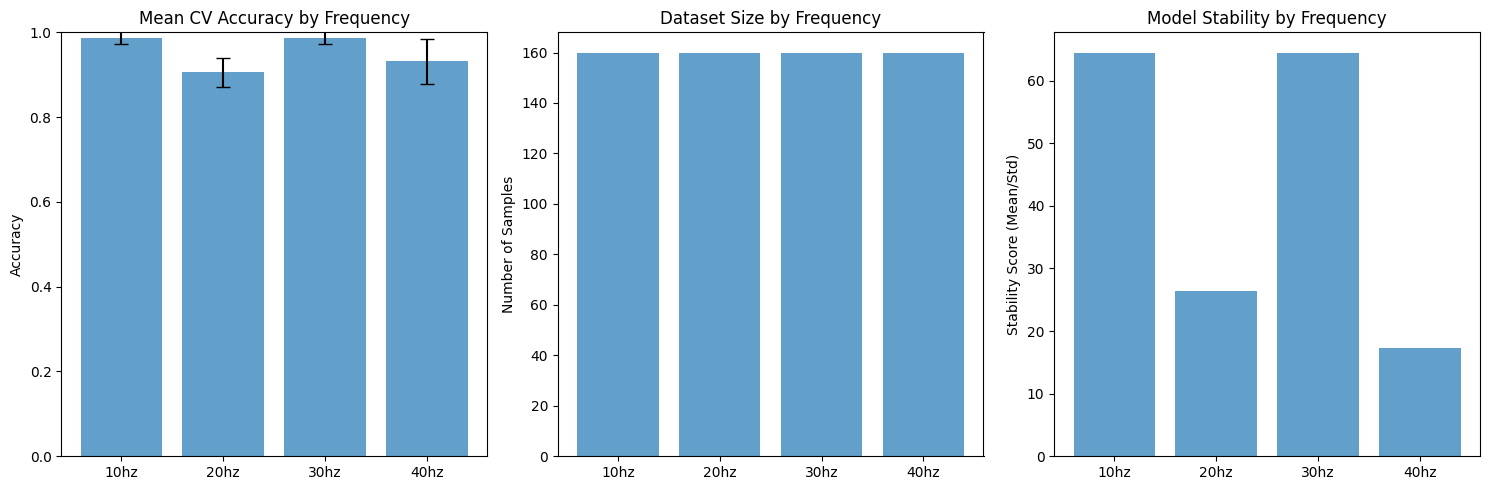


FREQUENCY PERFORMANCE TRENDS


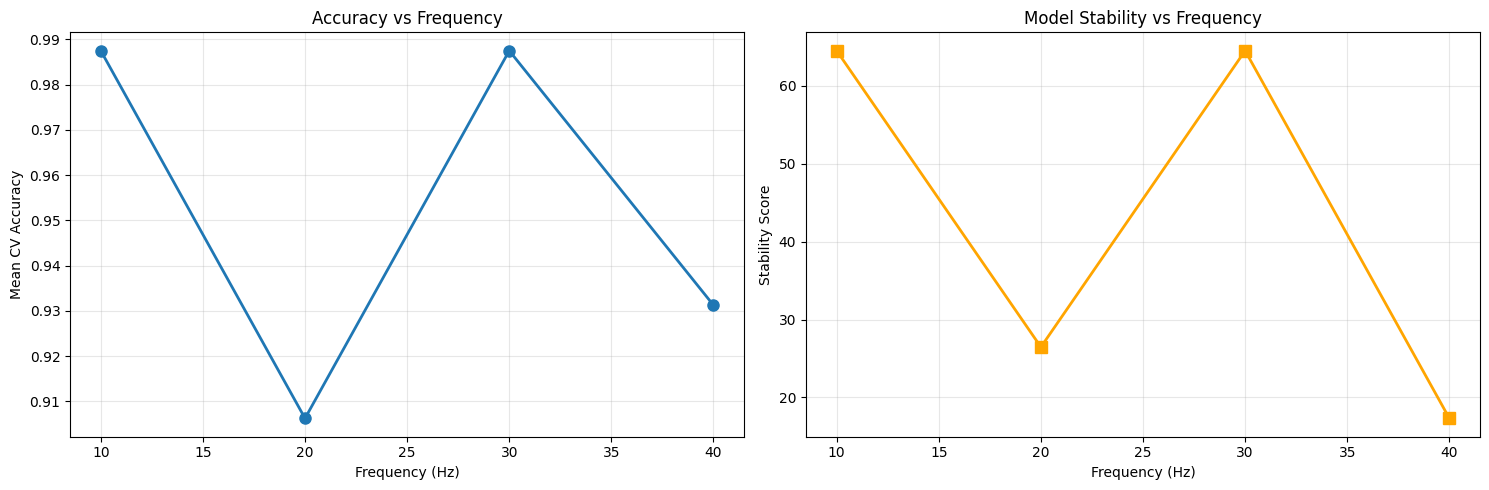


FREQUENCY ANALYSIS INSIGHTS:
Best accuracy: 10Hz (0.988)
Most stable: 10Hz (stability: 64.50)
Accuracy trend: decreasing with frequency


In [10]:
# Display comprehensive results
from ml_toolbox.analysis import (
    plot_cv_results_comparison, 
    create_performance_summary,
    analyze_frequency_performance_trends
)

# 1. Performance Summary Table
print("PERFORMANCE SUMMARY ACROSS FREQUENCIES")
print("=" * 60)
performance_summary = create_performance_summary(cv_results)
print(performance_summary.to_string(index=False))

# 2. Plot comprehensive CV results comparison
print("\nCOMPREHENSIVE CROSS-VALIDATION ANALYSIS")
plot_cv_results_comparison(cv_results)

# 3. Analyze performance trends
print("\nFREQUENCY PERFORMANCE TRENDS")
analyze_frequency_performance_trends(cv_results)

DETAILED CV SCORES BY FOLD FOR EACH FREQUENCY


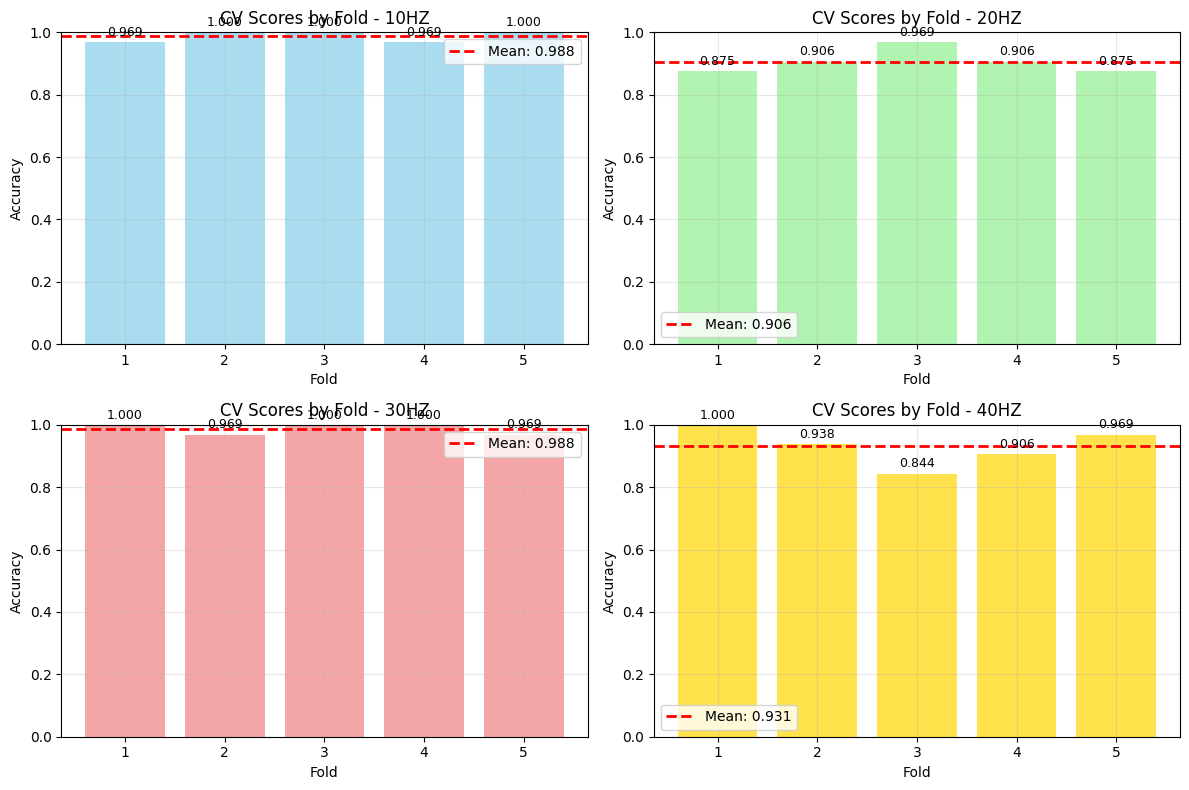

In [11]:
# Improved CV Scores Visualization
from ml_toolbox.analysis import plot_cv_scores_by_fold

print("DETAILED CV SCORES BY FOLD FOR EACH FREQUENCY")
print("=" * 60)
plot_cv_scores_by_fold(cv_results)

FEATURE IMPORTANCE COMPARISON

TOP 10 FEATURES for 10HZ:
   1. current_phase_b_band_4_2000_5000hz_peak | 0.0452 ± 0.0011
   2. current_phase_a_iqr       | 0.0440 ± 0.0100
   3. current_phase_a_spectral_flux | 0.0424 ± 0.0018
   4. current_phase_b_peak_magnitude | 0.0412 ± 0.0022
   5. current_phase_a_std       | 0.0397 ± 0.0037
   6. current_phase_a_band_1_0_50hz_std | 0.0373 ± 0.0023
   7. current_phase_a_band_1_0_50hz_energy | 0.0320 ± 0.0104
   8. current_phase_b_iqr       | 0.0301 ± 0.0043
   9. current_phase_a_var       | 0.0284 ± 0.0017
  10. current_phase_b_var       | 0.0284 ± 0.0019

TOP 10 FEATURES for 20HZ:
   1. current_phase_a_spectral_flux | 0.0419 ± 0.0023
   2. current_phase_b_peak_magnitude | 0.0400 ± 0.0019
   3. current_phase_a_band_1_0_50hz_std | 0.0392 ± 0.0021
   4. current_phase_b_band_4_2000_5000hz_peak | 0.0391 ± 0.0022
   5. current_phase_a_std       | 0.0380 ± 0.0018
   6. current_phase_a_band_1_0_50hz_mean | 0.0361 ± 0.0052
   7. current_phase_b_spectral_flu

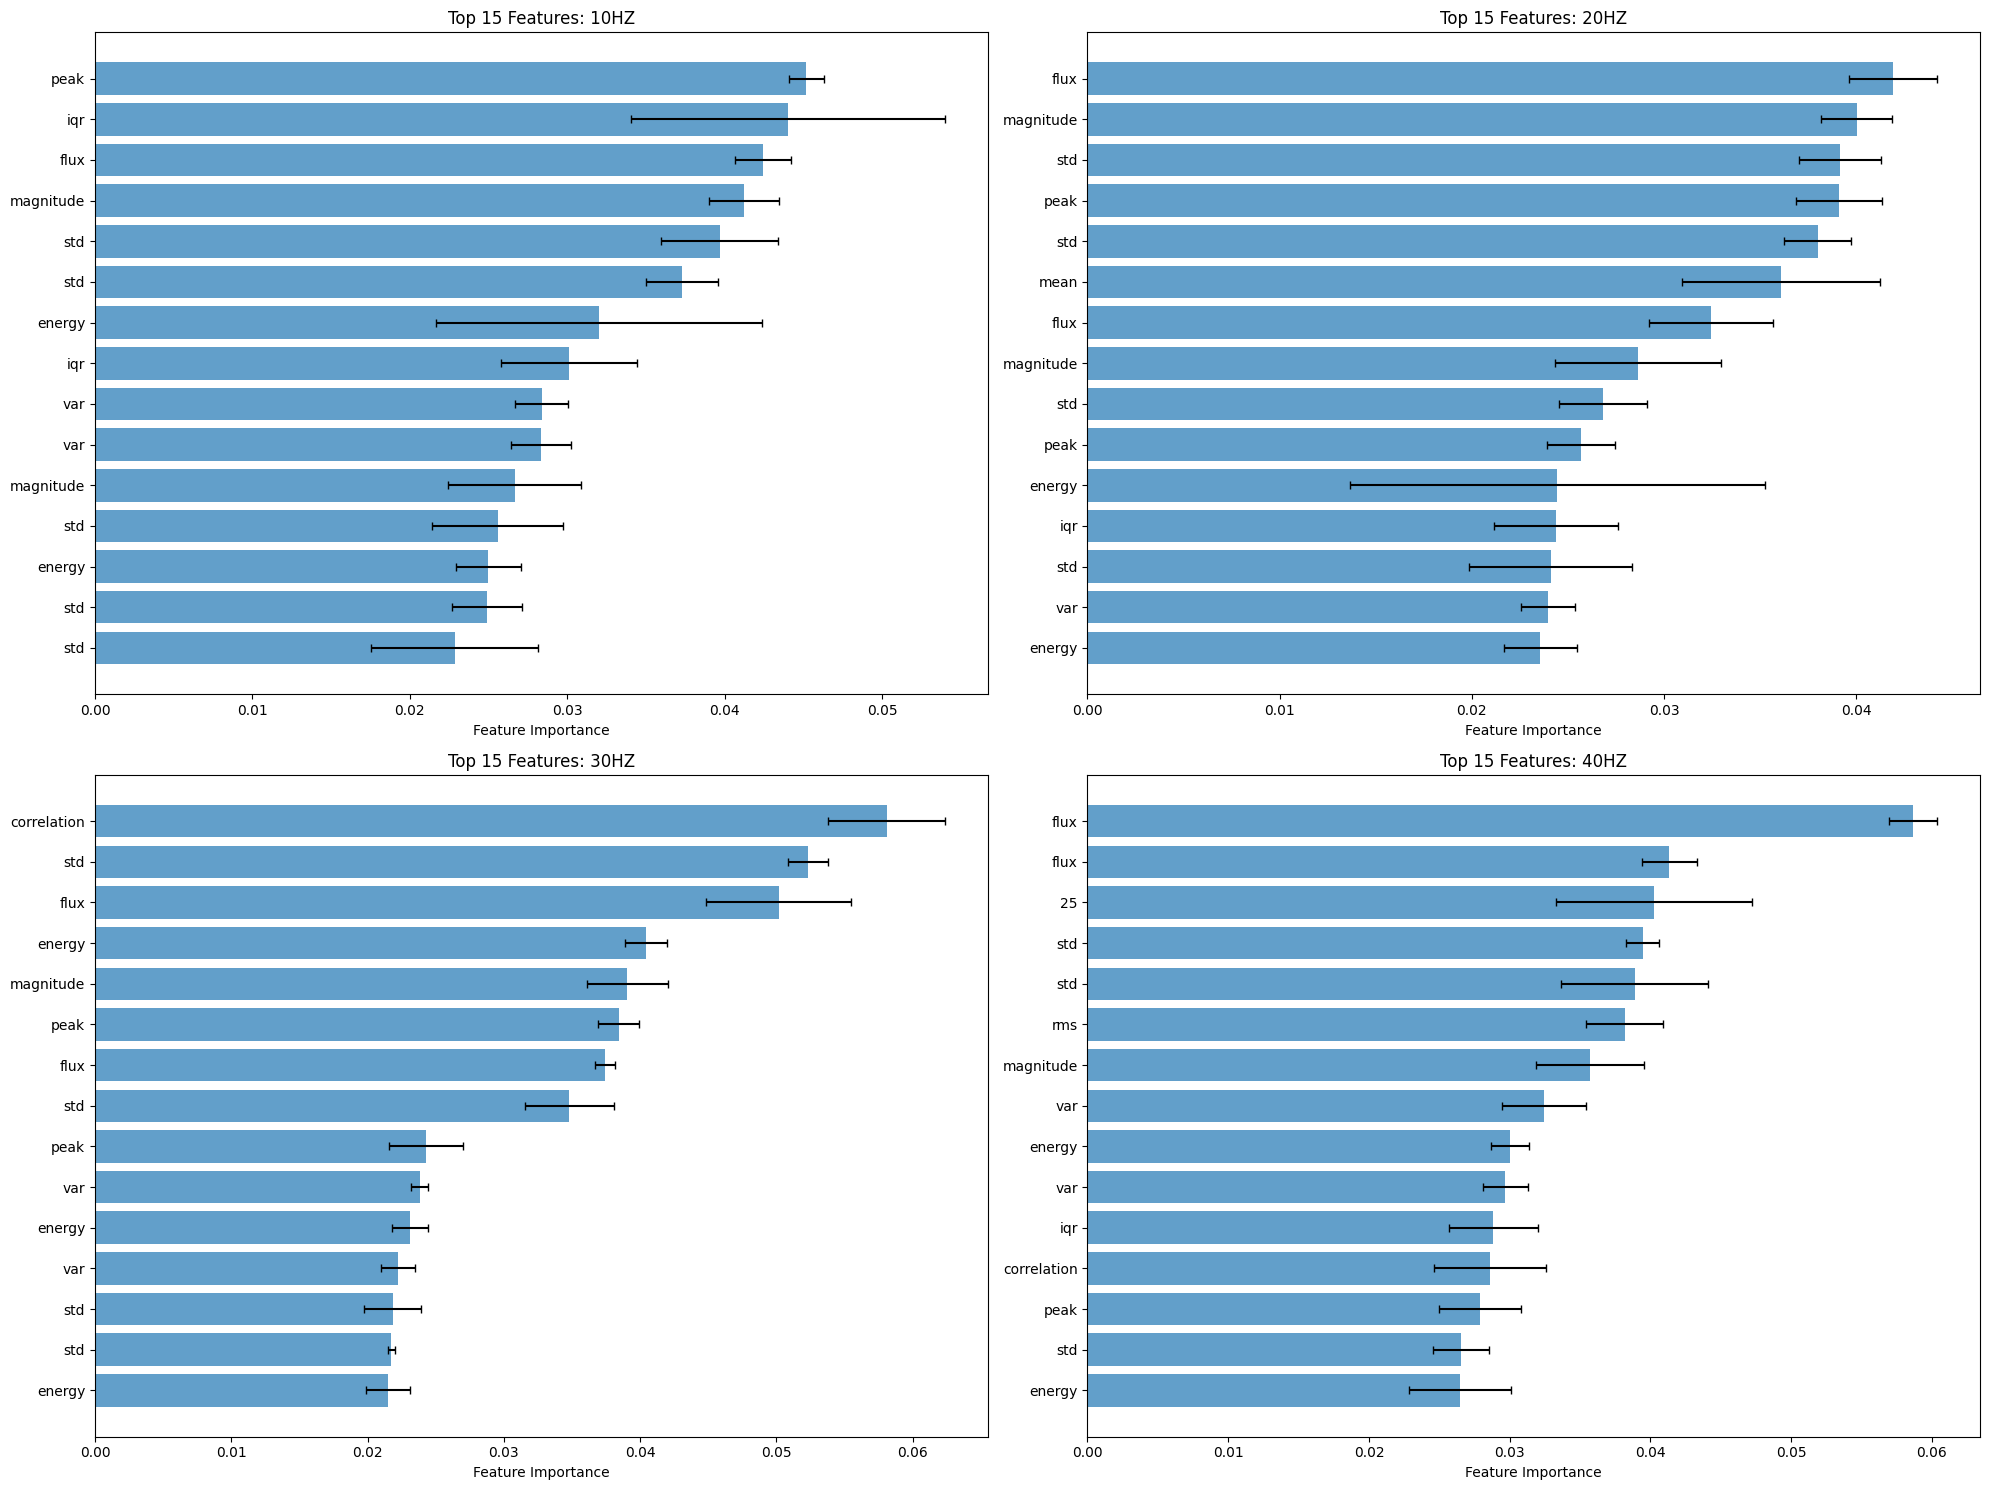


CROSS-FREQUENCY FEATURE RANKING


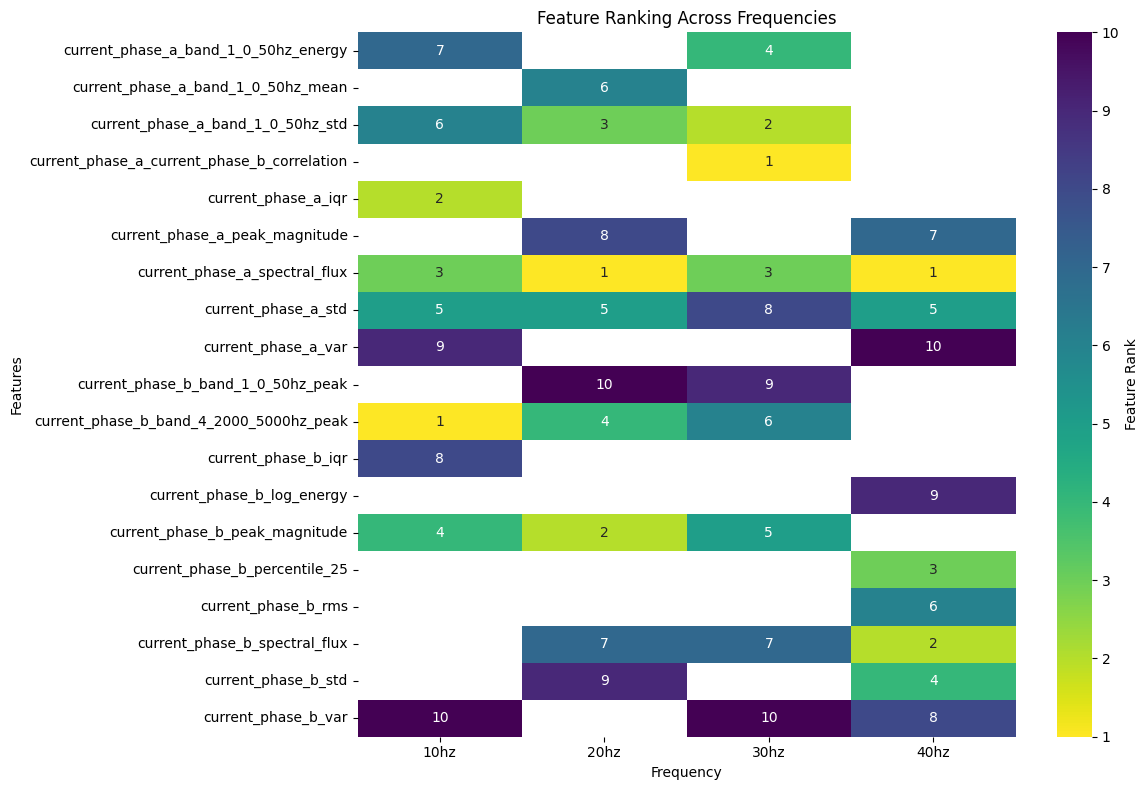

In [12]:
# Feature importance comparison across frequencies
print("FEATURE IMPORTANCE COMPARISON")
print("=" * 60)

# 1. Show top features for each frequency
for freq in frequencies_to_analyze:
    if freq in importance_results:
        print(f"\nTOP 10 FEATURES for {freq.upper()}:")
        top_10 = importance_results[freq].head(10)
        for i, (_, row) in enumerate(top_10.iterrows(), 1):
            print(f"  {i:2d}. {row['Feature']:<25} | {row['Mean_Importance']:.4f} ± {row['Std_Importance']:.4f}")

# 2. Plot feature importance comparison
print(f"\nFEATURE IMPORTANCE VISUALIZATION")
plot_feature_importance_comparison(importance_results, top_n=15)

# 3. Compare top features across frequencies
print(f"\nCROSS-FREQUENCY FEATURE RANKING")
comparison_df = compare_top_features_across_frequencies(importance_results, top_n=10)